In [1]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [26]:
df = pd.read_csv("global_power.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.shape

(908, 25)

In [22]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [30]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [31]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [32]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [33]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [34]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [35]:
df['year_of_capacity_data'].nunique()

1

In [36]:
df['name'].nunique()

908

In [37]:
df.drop(['name','url'],axis=1,inplace=True)

In [38]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [39]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [40]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [45]:
import warnings
warnings.simplefilter("ignore")

df.fillna(df.median()[0], inplace=True)

In [46]:
df.isnull().sum()


country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [47]:
df['source'].nunique()

191

In [48]:
df['geolocation_source'].nunique()

3

In [49]:
df['country_long'].nunique()

1

In [50]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

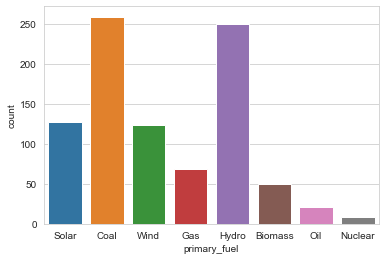

In [52]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [53]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,Coal,60.0,Ultratech Cement ltd,WRI,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,Wind,60.0,CDM,WRI,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [54]:
dfcorr=df.corr()

<AxesSubplot:>

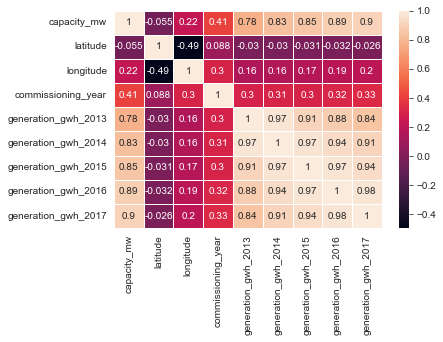

In [55]:
sns.heatmap(dfcorr,annot=True, linewidth=1)


<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

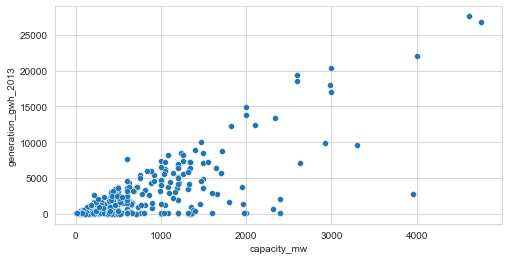

In [56]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

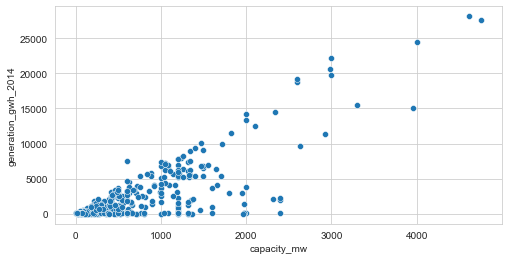

In [57]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

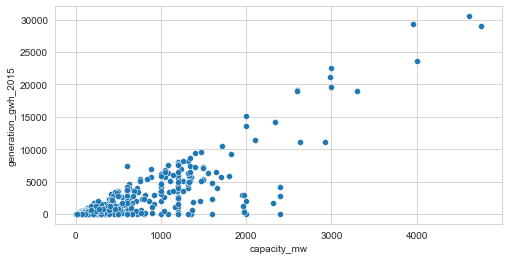

In [58]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

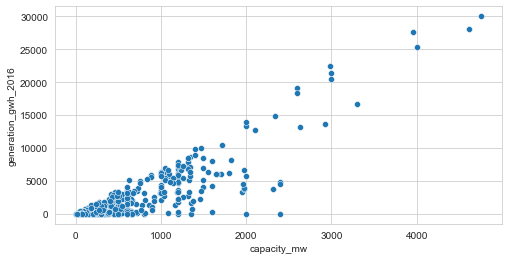

In [59]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

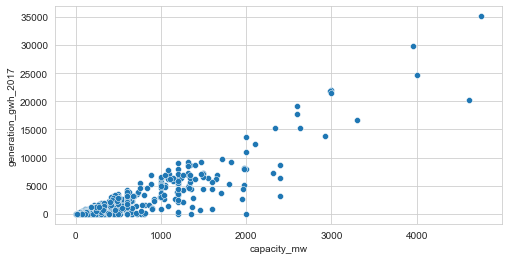

In [60]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

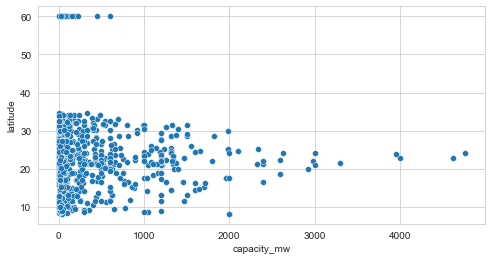

In [61]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

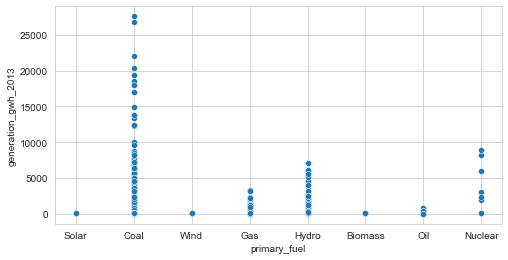

In [62]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

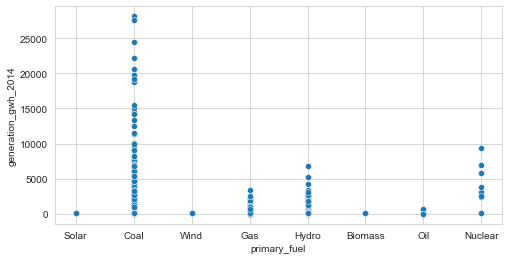

In [63]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

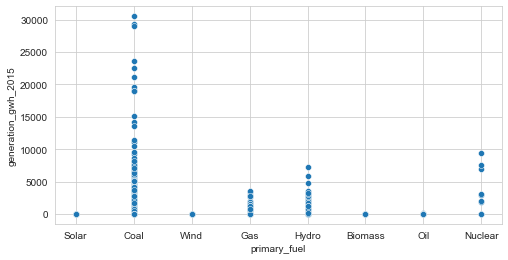

In [64]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

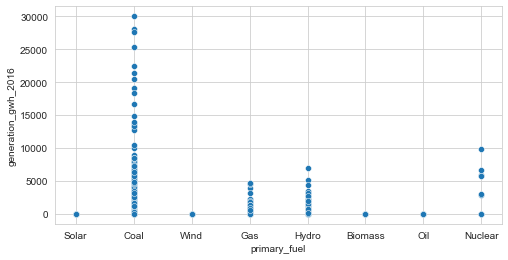

In [65]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

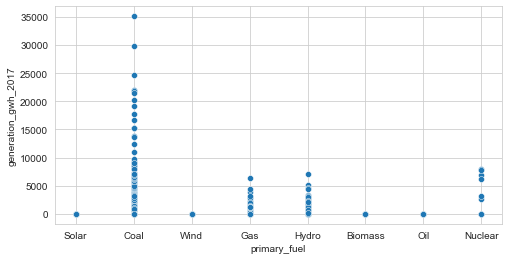

In [66]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

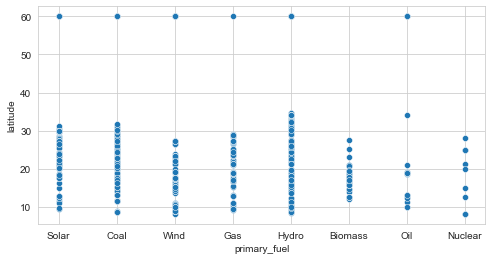

In [67]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

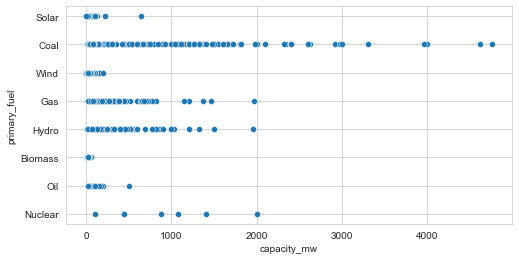

In [68]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [70]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [71]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [73]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [74]:
df['geolocation_source'].unique()

array([1, 2, 0], dtype=int64)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int64  
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    int32  
 6   geolocation_source   908 non-null    int64  
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(1), int64(2)
memory usage: 81.7 KB


            Outliers Removal

In [76]:
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [77]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]


In [79]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (908, 12)
Shape of the dataframe after removing outliers:  (885, 12)
Percentage of data loss post outlier removal:  2.5330396475770924


In [80]:
df=df1.copy()

In [81]:
df.shape

(885, 12)

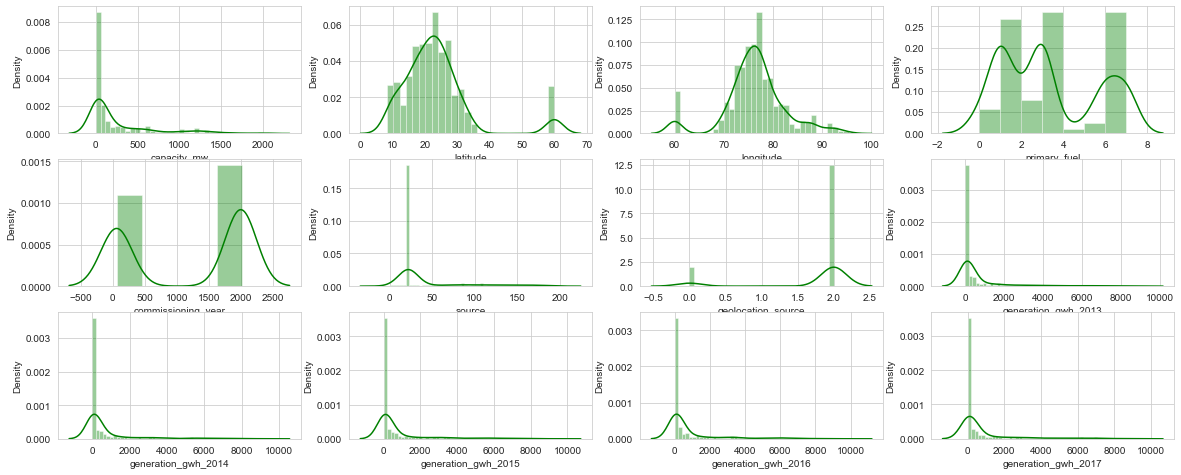

In [85]:
plt.figure(figsize=(20,22))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [86]:
df.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

In [87]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

capacity_mw            0.014952
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
commissioning_year    -0.285274
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013   -0.034887
generation_gwh_2014   -0.014669
generation_gwh_2015   -0.012333
generation_gwh_2016   -0.009262
generation_gwh_2017   -0.005003
dtype: float64

            Dividing Data into X and Y

In [88]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [90]:
x.shape

(885, 11)

In [91]:
y.shape

(885,)

In [92]:
sc=MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [93]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.290048,0.464901,0.466182,0.564383,0.233637,0.863277,0.591291,0.568494,0.568932,0.566561,0.565028
std,0.204202,0.173085,0.326078,0.489898,0.237158,0.342100,0.183883,0.196731,0.200379,0.202994,0.210328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169119,0.388333,0.142857,0.000000,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
50%,0.269591,0.463212,0.428571,0.978039,0.115789,1.000000,0.504674,0.478042,0.477061,0.470282,0.465067
75%,0.359508,0.539802,0.857143,0.991828,0.184211,1.000000,0.710270,0.700391,0.703337,0.699987,0.703190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
pd.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
0,885.0,0.290048,0.204202,0.0,0.169119,0.269591,0.359508,1.0
1,885.0,0.464901,0.173085,0.0,0.388333,0.463212,0.539802,1.0
2,885.0,0.466182,0.326078,0.0,0.142857,0.428571,0.857143,1.0
3,885.0,0.564383,0.489898,0.0,0.000000,0.978039,0.991828,1.0
4,885.0,0.233637,0.237158,0.0,0.115789,0.115789,0.184211,1.0
5,885.0,0.863277,0.342100,0.0,1.000000,1.000000,1.000000,1.0
6,885.0,0.591291,0.183883,0.0,0.504674,0.504674,0.710270,1.0
7,885.0,0.568494,0.196731,0.0,0.478042,0.478042,0.700391,1.0
8,885.0,0.568932,0.200379,0.0,0.477061,0.477061,0.703337,1.0
9,885.0,0.566561,0.202994,0.0,0.470282,0.470282,0.699987,1.0


            MODEL BUILDING:
Linear Regression
CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [95]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6033793987661353
At random state 0, The test accuracy is: 0.6216727027615341


At random state 1, The training accuracy is: 0.6083279878933308
At random state 1, The test accuracy is: 0.6022223138115208


At random state 2, The training accuracy is: 0.6353782409904477
At random state 2, The test accuracy is: 0.46882898666139583


At random state 3, The training accuracy is: 0.6102288217663276
At random state 3, The test accuracy is: 0.591963521534806


At random state 4, The training accuracy is: 0.6088027364078052
At random state 4, The test accuracy is: 0.5962173327956521


At random state 5, The training accuracy is: 0.620339909413044
At random state 5, The test accuracy is: 0.5423848089457906


At random state 6, The training accuracy is: 0.6179931752699392
At random state 6, The test accuracy is: 0.5442706774717505


At random state 7, The training accuracy is: 0.6162228512356386
At random state 7, The test accuracy is: 0.557057958233

            SPLITTING THE DATA WITH RANDOM STATE =95

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [97]:
x_train.shape

(646, 11)

In [98]:
x_test.shape

(239, 11)

In [99]:
y_test.shape

(239,)

In [100]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.5864596104267872


In [101]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.3678555845581379
MAE: 0.4830078050551142
r2_score: 0.36638342580206273


            RIDGE

In [102]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.5863280068229355


In [103]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.3674881298516638
MAE: 0.4840962934912544
r2_score: 0.35881863372023304


In [104]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.5456748672496734


            RandomForestRegressor

In [108]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9598591717327952


In [109]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.15348269090674654
MAE: 0.2866248214415804
r2_score: 0.8132753121707617


        DecisionTreeRegressor

In [110]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9906753612727366


In [111]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.31814502055964616
MAE: 0.4136229383412216
r2_score: 0.66583456522186


        GradientBoostingRegressor

In [112]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8802104166754463


In [113]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.150265406999226
MAE: 0.2977354213542265
r2_score: 0.8112545988048696


                       Cross Validation     

In [114]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.405445, 0.062499
R    : 0.404019, 0.062006
svr    : 0.446500, 0.076536
svr_p    : 0.249986, 0.053431
svr_r    : 0.231048, 0.063926
RF    : 0.211109, 0.060104
DTR    : 0.325838, 0.097565
GBR    : 0.204018, 0.063639


            With GradientBoostingRegressor

In [116]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [118]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [120]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [121]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [122]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.14975399518721538
MAE: 0.2827110592241609
r2_score: 0.8179831151166288


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

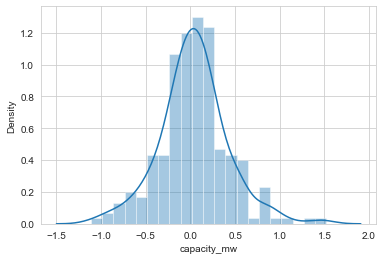

In [123]:
sns.distplot(GF_grid_pred-y_test)

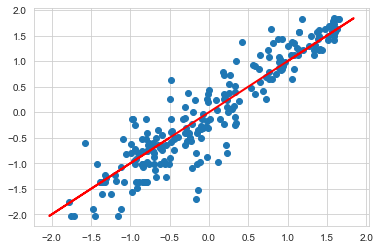

In [124]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

                Choosing GradientBoostingRegressor as the best model
TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL Dividing data into X and Y

In [125]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [126]:
x.shape

(885, 11)

In [127]:
y.shape

(885,)

            Spliting Train and Test data

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)
x_train.shape
(646, 11)

(646, 11)

In [129]:
x_train.shape


(646, 11)

In [130]:
x_test.shape

(239, 11)

In [131]:
y_train.shape

(646,)

            MODEL BUILDING:

In [132]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [133]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.5344632768361581


In [134]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.5481171548117155
[[ 0  3  0  0  0  0  8  1]
 [ 0  7  0 42  0  0 15  4]
 [ 0  2  0 14  0  0  2  1]
 [ 0  4  0 64  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  3  0]
 [ 0  2  0  0  0  0 25  3]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.39      0.10      0.16        68
           2       0.00      0.00      0.00        19
           3       0.52      0.94      0.67        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.47      0.83      0.60        30
           7       0.80      1.00      0.89        35

    accuracy                           0.55       239
   macro avg       0.27      0.36      0.29       239
weighted avg       0.43      0.55      0.44       239

Training accuracy:: 0.5309597523219814
Test accuracy:: 0.5481171548117155


In [135]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7864406779661017


dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

RandomForestClassifier


In [139]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8474576271186441


In [140]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8493723849372385
[[11  1  0  0  0  0  0  0]
 [ 6 53  0  7  0  2  0  0]
 [ 0  5  6  6  0  2  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.83      0.78      0.80        68
           2       0.86      0.32      0.46        19
           3       0.83      0.96      0.89        68
           4       0.00      0.00      0.00         2
           5       0.38      0.60      0.46         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       239
   macro avg       0.69      0.70      0.67       239
weighted avg       0.85      0.85      0.84       239

Training accuracy:: 1.0
Test accuracy:: 0.8493723849372385


ENSEMBLE TECHNIQUES
1. ADA BOOST CLASSIFIER

In [141]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.5458503575076609


In [142]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.41841004184100417
[[ 0  0  0 12  0  0  0  0]
 [ 0  3  0 65  0  0  0  0]
 [ 0  0  0 19  0  0  0  0]
 [ 0  0  0 68  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0 29  0]
 [ 0 35  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.08      0.04      0.06        68
           2       0.00      0.00      0.00        19
           3       0.40      1.00      0.57        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        30
           7       0.00      0.00      0.00        35

    accuracy                           0.42       239
   macro avg       0.18      0.25      0.20       239
weighted avg       0.26      0.42      0.30       239

Training accuracy:: 0.44272445820433437
Test accuracy:: 0.41841004184100417


2. BAGGING CLASSIFIER

In [146]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8258810010214503


bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

Model training with best parameters

In [147]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [149]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [150]:

best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8284518828451883


            Report of RandomForestClassifier

In [151]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.84      0.75      0.79        68
           2       0.80      0.21      0.33        19
           3       0.78      0.96      0.86        68
           4       0.00      0.00      0.00         2
           5       0.29      0.40      0.33         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.83       239
   macro avg       0.66      0.65      0.63       239
weighted avg       0.83      0.83      0.81       239



<AxesSubplot:>

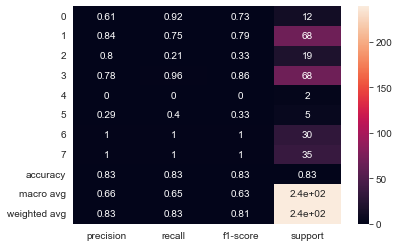

In [152]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [153]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.936752 (macro),
0.950476 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.951656 (macro),
0.971103 (weighted by prevalence)


In [154]:
import joblib
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']